In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#  Load the data

In [2]:
df = pd.read_csv('data/train.csv')

# Look at first few rows

In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Check for missing values

In [4]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Visualisation 

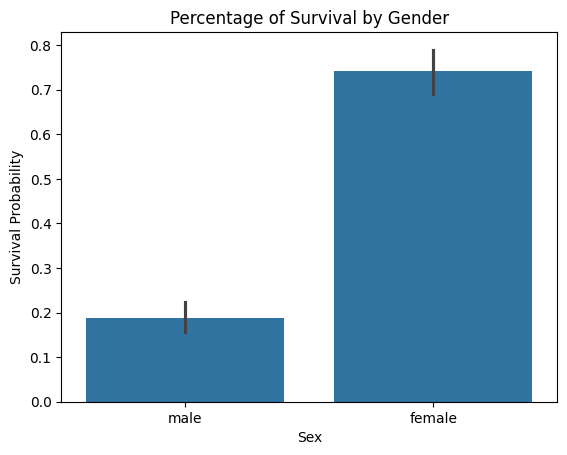

In [5]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Percentage of Survival by Gender')
plt.ylabel('Survival Probability')
plt.show()

# Handle missing age

In [6]:
# Extract Title
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Check the counts
print(df['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [7]:
# Calculate the average age for each title
title_means = df.groupby('Title')['Age'].transform('mean')
print(f'title means :{title_means}')

# Fill missing Age values
df['Age'] = df['Age'].fillna(title_means)

# Verify
print(f"Missing ages: {df['Age'].isnull().sum()}")

title means :0      32.368090
1      35.898148
2      21.773973
3      35.898148
4      32.368090
         ...    
886    43.166667
887    21.773973
888    21.773973
889    32.368090
890    32.368090
Name: Age, Length: 891, dtype: float64
Missing ages: 0


# Drop the cabin column

In [8]:
df.drop(columns=['Cabin'], inplace=True)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='str')


# IsAlone feature

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate Family Size (Siblings + Parents + the passenger themselves)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 2. Create isAlone feature (1 if alone, 0 if with family)
df['isAlone'] = 0  # Initialize to 0
df.loc[df['FamilySize'] == 1, 'isAlone'] = 1

# Check the first few rows
print(df[['isAlone', 'FamilySize', 'Survived']].head())

   isAlone  FamilySize  Survived
0        0           2         0
1        0           2         1
2        1           1         1
3        0           2         1
4        1           1         0


## Model

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "FamilySize"]

# Convert text to numbers (One-Hot Encoding)
X = pd.get_dummies(df[features])
y = df["Survived"]

# Split the data 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Initialize the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

model.fit(X_train, y_train)

# Check the Score
Accuracy = model.score(X_val, y_val)
print(f"Model Accuracy on Validation Set: {Accuracy:.2%}")

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(f"Average Accuracy: {scores.mean():.2%}")

Model Accuracy on Validation Set: 82.68%
Average Accuracy: 83.39%
